Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/05_Classification'
except ImportError as e:
    pass

## Exercise 5: Classification

### 5.1. Learning a classifier for the Iris Data Set

In the last exercise, you have learned lazy classification models for the Iris dataset. Now try a Decision Tree based approach with 10-fold cross-validation. Use a pipeline to perform some preprocessing before learning or applying the decision tree classifier.

#### 5.1.1.	Discretise the Iris data set into three bins. Then use the DecisionTreeClassifier with a 10-fold stratified cross validation and compute the accuracy. Afterwards plot the decision tree.

Fitted a decision tree with 23 nodes. Cross-validated accuracy is 97.33333333333334%


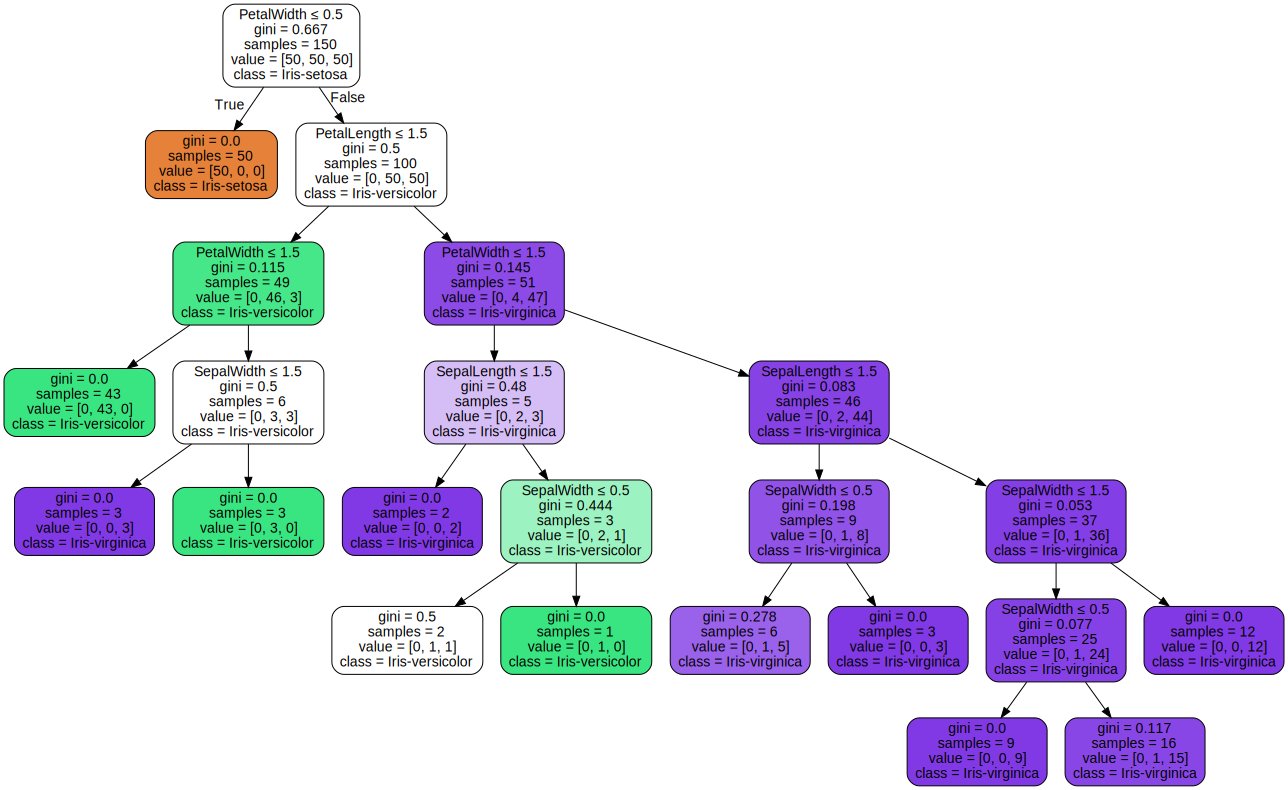

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

# import os
# os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

iris = pd.read_csv("iris.csv")
iris_data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = iris['Name']

discretiser = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal')
estimator = DecisionTreeClassifier()
pipeline = Pipeline([ ('discretiser', discretiser), ('estimator', estimator)])

accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

pipeline.fit(iris_data, iris_target)

print("Fitted a decision tree with {} nodes. Cross-validated accuracy is {}%".format(estimator.tree_.node_count, accuracy.mean() * 100))

import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=iris_data.columns, 
                                class_names=iris_target.unique(),
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

#### 5.1.2.	Remove the discretization and adjust the max_depth parameter of DecisionTreeClassifier to increase the accuracy. Does the accuracy change? Compare the complexity of the two models. Which model should be preferred according to Occam’s razor?

Fitted a decision tree with 17 nodes. Cross-validated accuracy is 96.0%


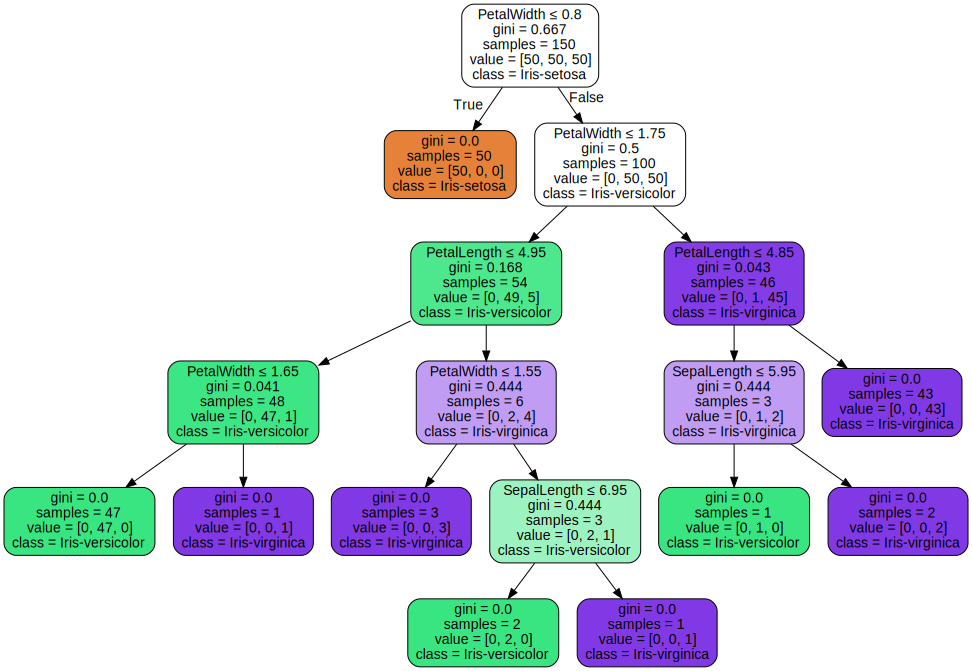

In [3]:
pipeline.set_params(discretiser=None)
estimator = DecisionTreeClassifier()
accuracy = cross_val_score(estimator, iris_data, iris_target, cv=10, scoring='accuracy')

estimator.fit(iris_data, iris_target)

print("Fitted a decision tree with {} nodes. Cross-validated accuracy is {}%".format(estimator.tree_.node_count, accuracy.mean() * 100))

dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=iris_data.columns, 
                                class_names=iris_target.unique(),
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

In [4]:
for depth in range(1, 15):
    accuracy = cross_val_score(DecisionTreeClassifier(max_depth=depth), iris_data, iris_target, cv=10, scoring='accuracy')
    print("max_depth={}: {}% accuracy".format(depth, accuracy.mean()*100))

max_depth=1: 66.66666666666667% accuracy
max_depth=2: 94.66666666666667% accuracy
max_depth=3: 96.0% accuracy
max_depth=4: 96.0% accuracy
max_depth=5: 95.33333333333334% accuracy
max_depth=6: 95.33333333333334% accuracy
max_depth=7: 95.33333333333334% accuracy
max_depth=8: 96.0% accuracy
max_depth=9: 95.33333333333334% accuracy
max_depth=10: 95.33333333333334% accuracy
max_depth=11: 95.33333333333334% accuracy
max_depth=12: 95.33333333333334% accuracy
max_depth=13: 95.33333333333334% accuracy
max_depth=14: 95.33333333333334% accuracy


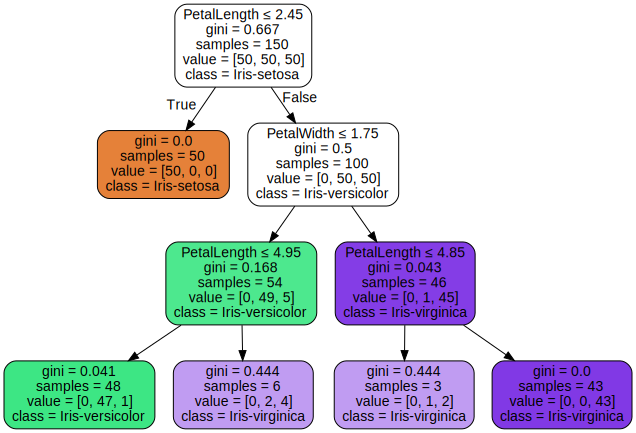

In [5]:
#choose 3
estimator = DecisionTreeClassifier(max_depth=3)

estimator.fit(iris_data, iris_target)
dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=iris_data.columns, 
                                class_names=iris_target.unique(),
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

Solution: Occam’s Razor: Given two models of similar generalization errors, one should prefer the simpler model over the more complex model.

Conclusion: We choose the simpler model with comparable accuracy.

## Exercise 5: Classification

### 5.2. Parameter optimization
In Exercise 4.1 we have used the German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html), which describes the customers of a bank with respect to whether they should get a bank credit or not. The data set is provided as credit-g.arff file in ILIAS.

#### 5.2.1.	(recap) Go back to the results of exercise 4.1.4. Re-run the classifiers with their default parameter settings.
- Used the 10-fold validation approach.
- Balanced the training set multiplying the “bad customer” examples. 
- Evaluated the results, setting up your cost matrix to ((0,100)(1,0)) – that is, you assumed you will lose 1 Unit if you refuse a credit to a good customer, but that you lose 100 Units if you give a bad customer a credit.

Rerun your process to get the performance results. Now additionally use a  Decision Tree Classifier. How does it perform? What were the default parameters of the Decision Tree?

In [6]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

First, we load the dataset:

In [7]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

credit_arff_data, credit_arff_meta = arff.loadarff(open('credit-g.arff', 'r'))
credit_data = pd.DataFrame(credit_arff_data)

# select all columns of type object
columns_with_binary_strings = credit_data.select_dtypes('object').columns.values

# decode the values of these columns using utf-8
credit_data[columns_with_binary_strings] = credit_data[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))
credit_target = credit_data['class']
credit_data = credit_data.drop(columns='class')

label_encoder = LabelEncoder()
credit_target = label_encoder.fit_transform(credit_target)
label_names=['bad','good']
label_order=label_encoder.transform(label_names)

credit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


Then, we set up a pipeline and evaluate it using cross validation:

k-NN Classifier
Cost: 12038
              precision    recall  f1-score   support

         bad       0.43      0.61      0.51       300
        good       0.80      0.66      0.72       700

    accuracy                           0.64      1000
   macro avg       0.61      0.63      0.61      1000
weighted avg       0.69      0.64      0.66      1000

Logistic Regression Classifier
Cost: 9920
              precision    recall  f1-score   support

         bad       0.48      0.68      0.56       300
        good       0.83      0.69      0.75       700

    accuracy                           0.68      1000
   macro avg       0.66      0.68      0.66      1000
weighted avg       0.73      0.68      0.69      1000



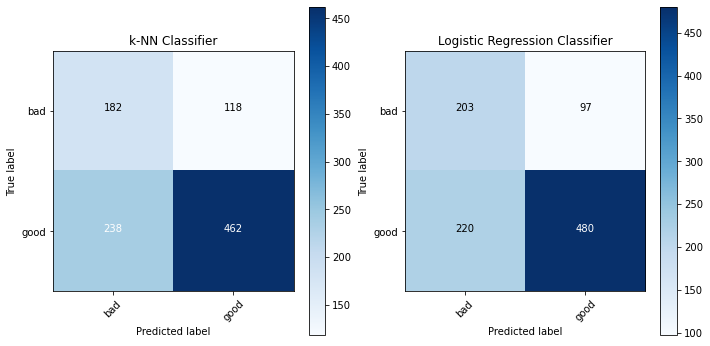

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

numeric_features = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
categorical_features = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
ordinal_features = [ 'checking_status', 'savings_status', 'employment']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('ord', OrdinalEncoder(categories=[
            [ 'no checking', '<0', '0<=X<200', '>=200' ],
            [ 'no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000' ],
            [ 'unemployed', '<1', '1<=X<4', '4<=X<7', '>=7' ]
        ]), ordinal_features)])


# create a new pipeline with balancing
pipeline = Pipeline([ ('preprocessing', preprocessor), ('balancing', RandomOverSampler()), ('estimator', None) ])

classes = label_encoder.classes_

def cost_function(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    return cm[0][1] * 100 + cm[1][0] * 1

# define the cross validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10,5))

# KNN
plt.subplot(1,2,1)
pipeline.set_params(estimator=KNeighborsClassifier())
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=label_order)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='k-NN Classifier')
cost = cost_function(credit_target, prediction)
report = classification_report(credit_target, prediction, target_names=classes)
print('k-NN Classifier')
print('Cost: ' + str(cost))
print(report)

# LogisticRegression
plt.subplot(1,2,2)
pipeline.set_params(estimator=LogisticRegression(max_iter=200))
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=label_order)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Logistic Regression Classifier')
cost = cost_function(credit_target, prediction)
report = classification_report(credit_target, prediction, target_names=classes)
print('Logistic Regression Classifier')
print('Cost: ' + str(cost))
print(report)

plt.show()

Decision Tree Classifier
Cost: 15381
              precision    recall  f1-score   support

         bad       0.45      0.49      0.47       300
        good       0.77      0.74      0.76       700

    accuracy                           0.67      1000
   macro avg       0.61      0.62      0.61      1000
weighted avg       0.68      0.67      0.67      1000



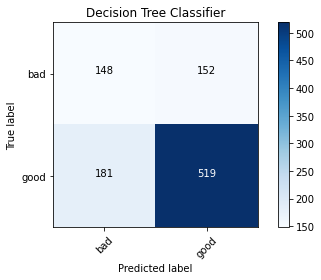

In [9]:
pipeline.set_params(estimator=DecisionTreeClassifier())
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=label_order)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Decision Tree Classifier')
cost = cost_function(credit_target, prediction)
report = classification_report(credit_target, prediction, target_names=classes)
print('Decision Tree Classifier')
print('Cost: ' + str(cost))
print(report)

Finally, we fit the pipeline to the dataset and plot the decision tree:

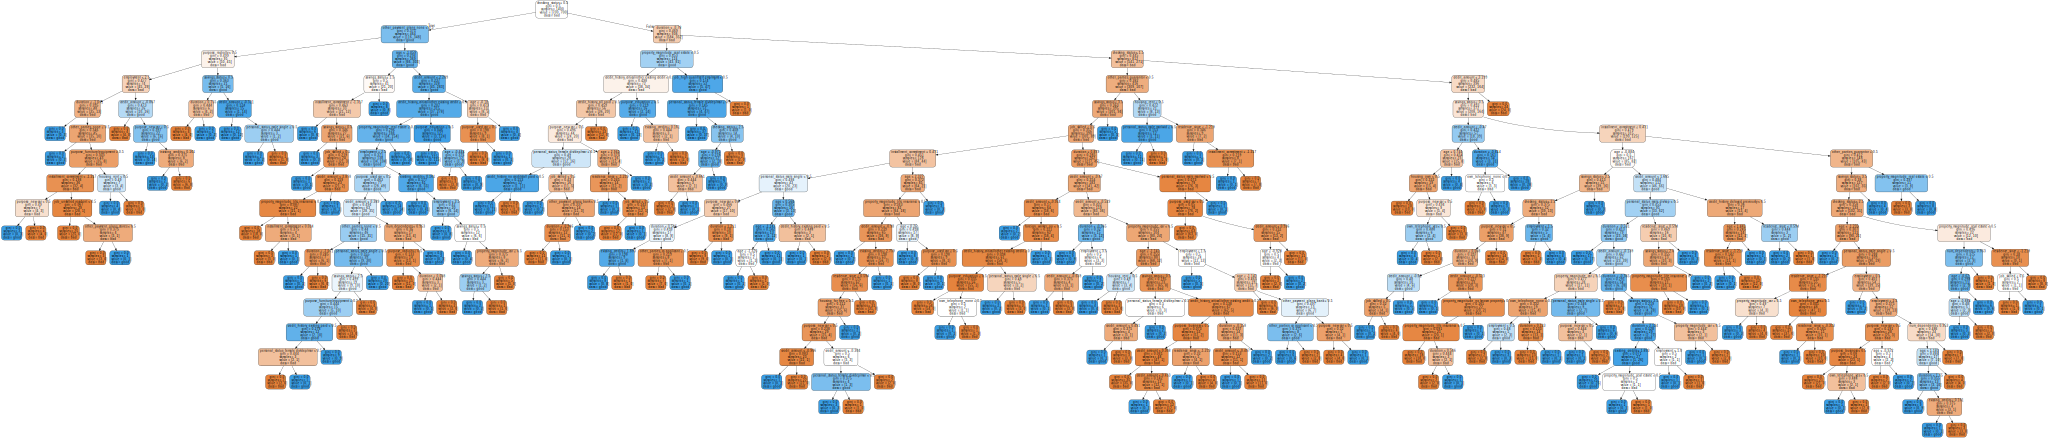

In [10]:
import graphviz 
from sklearn import tree
from sklearn.utils.multiclass import unique_labels

## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

# import os
# os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

pipeline.fit(credit_data, credit_target)

estimator = pipeline.named_steps['estimator']
pre = pipeline.named_steps['preprocessing']
feature_names = numeric_features + list(pre.named_transformers_['cat'].get_feature_names(categorical_features)) + ordinal_features

dot_data = tree.export_graphviz(estimator,
                feature_names=feature_names,
                class_names=label_names,
                filled=True, rounded=True, special_characters=True,out_file=None)
graph = graphviz.Source(dot_data)

display(graph)

Default Parameters for decision tree:
See [DecisionTreeClassifier in documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)

#### 5.2.2.	Now, try to find a more appropriate configuration for the Decision Tree classifier. Use the GridSearchCV from scikit-learn. 

Try the following parameters of the Decision Tree:
- criterion: ['gini', 'entropy']
- 'max_depth': [2, 3, 4, 5, None]
- 'min_samples_split' :[2,3,4,5]

You should come up with 48 (2 x 6 x 4) combinations.

What is the best configuration for the data set and the classification approach? 

Note: The grid search can take some time. You can use the ```n_jobs=-1``` parameter setting for the ```cross_val_predict()``` function to enable parallel processing (all CPU cores will be used).

Optimised Decision Tree with accuracy of 0.622 and cost 6516


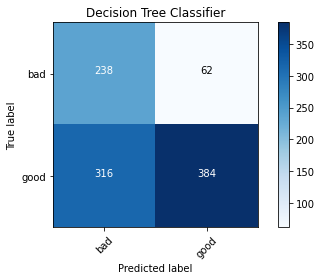

              precision    recall  f1-score   support

         bad       0.43      0.79      0.56       300
        good       0.86      0.55      0.67       700

    accuracy                           0.62      1000
   macro avg       0.65      0.67      0.61      1000
weighted avg       0.73      0.62      0.64      1000

Optimised Parameters: {'estimator__criterion': 'entropy', 'estimator__max_depth': 2, 'estimator__min_samples_split': 2}


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# define the parameter grid
parameters = {
    'estimator__criterion':['gini', 'entropy'], 
    'estimator__max_depth':[ 2, 3, 4, 5, None],
    'estimator__min_samples_split' :[2,3,4,5]
}

# define the folds for the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create a scorer for the grid search
cost_score = make_scorer(cost_function, greater_is_better=False)

# create the grid search estimator
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring=cost_score, cv=stratified_10_fold_cv)

# cross-validate
prediction = cross_val_predict(grid_search_estimator, credit_data, credit_target, cv=cv, n_jobs=-1)

# calculate costs
cm = confusion_matrix(credit_target, prediction, labels=label_order)
cost = cost_function(credit_target, prediction)
acc = accuracy_score(credit_target, prediction)

print("Optimised Decision Tree with accuracy of {} and cost {}".format(acc, cost))
plot_confusion_matrix(cm, classes=label_names, title='Decision Tree Classifier')
plt.show()
print(classification_report(credit_target, prediction, target_names=label_names))

# fit the grid search (= determine the optimal parameters)
grid_search_estimator.fit(credit_data, credit_target)
print("Optimised Parameters: {}".format(grid_search_estimator.best_params_))

#### 5.1.4.	How does the optimal decision tree differ from the one you have learned in 5.2.1?
Plot the optimised tree!

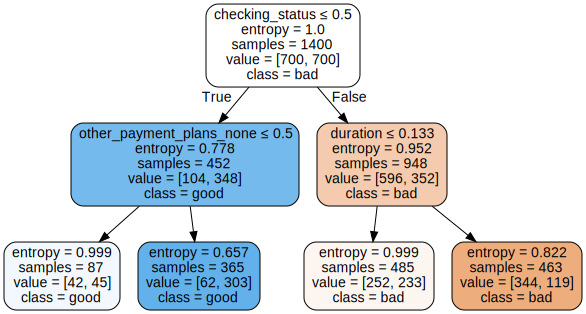

In [12]:
estimator = grid_search_estimator.best_estimator_.named_steps['estimator']
pre = grid_search_estimator.best_estimator_.named_steps['preprocessing']
feature_names = numeric_features + list(pre.named_transformers_['cat'].get_feature_names(categorical_features)) + ordinal_features

dot_data = tree.export_graphviz(
    estimator,
    feature_names=feature_names,
    class_names=label_names,
    filled=True, rounded=True, special_characters=True,out_file=None)
graph = graphviz.Source(dot_data)
display(graph)